chapitre 1 : analyse exploratoire

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

data = pd.read_csv('/content/winequality-white.csv', sep=";")


print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [ ]:
data.shape()

In [ ]:
X = data[data.columns[:-1]].values
y = data['quality'].values

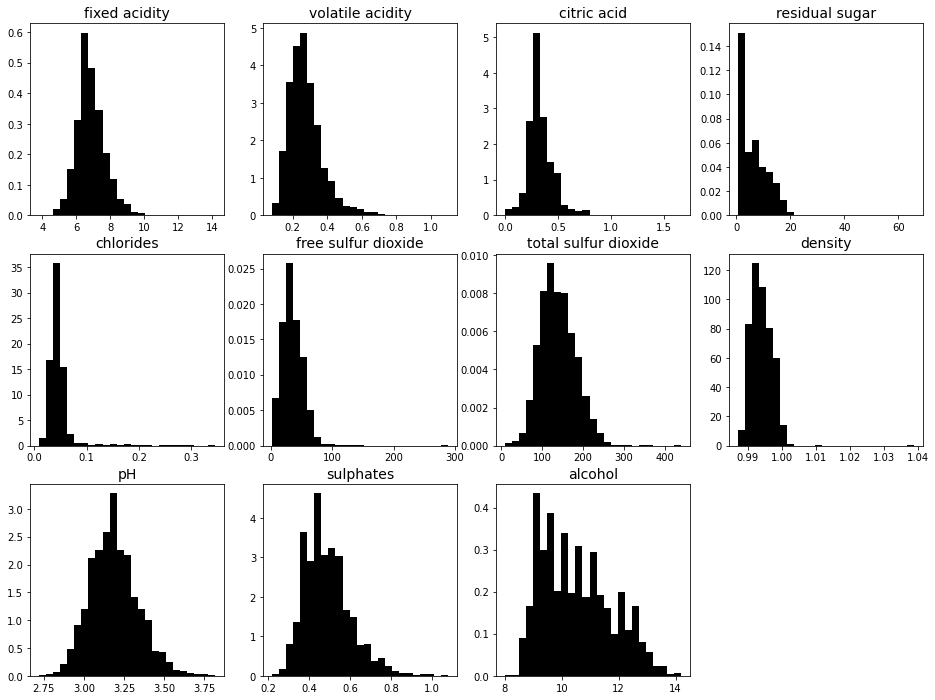

In [ ]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=25, color='black', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)


In [ ]:
########## JE vous invite à vous créer votre propre fonction ici, avec les graphs qui vous plaisent et que vous maitrisez.

import plotly.graph_objects as go
def stat_desc_comparaison(data1, nom_data1): 
        ## PARTIE VARIABLES QUALITATIVES ##
    print("VARIABLES QUALITATIVES : ")
    print('------------------------------------------------------------------------------------------------')
    for col in data1.select_dtypes(include='object').columns:
        if(len(data1[col].value_counts())>100):
            print("La variables qualitative a un nombre trop important de valeurs différentes et a été écartée de l'analyse : "
             + str(col))
        else:
            # Creation des value_counts
            table_to_plot1 = pd.DataFrame(data1[col].value_counts(normalize=True)*100)
            table_to_plot1['Nom_label'] = table_to_plot1.index
            fig = px.pie(table_to_plot1, values=col, names='Nom_label')
            # Tune layout and hover info
            fig.update_traces(hoverinfo='label+percent+name', textinfo='none')
            fig.update(layout_title_text='Répartition de la variable :  '+ col,
                       layout_showlegend=False)
            fig = go.Figure(fig)
            fig.show()
    #         return(fig.show())
    ## PARTIE QUANTITATIVE ## 
    print("VARIABLES QUANTITATIVES : ")
    print('------------------------------------------------------------------------------------------------')
    for col in data1.select_dtypes(include=np.number).columns:
        fig = go.Figure()
        fig.add_trace(go.Histogram(x=data1[col], name=nom_data1))
        # Overlay both histograms
        fig.update_layout(barmode='overlay')
        # title
        fig.update(layout_title_text='Histogrammes de la variable :  '+ col)
        # Reduce opacity to see both histograms
        fig.update_traces(opacity=0.75)
        fig.show()

In [ ]:
stat_desc_comparaison(data,"X")

VARIABLES QUALITATIVES : 
------------------------------------------------------------------------------------------------
VARIABLES QUANTITATIVES : 
------------------------------------------------------------------------------------------------


In [ ]:
########## Choix pour retomber sur une target binaire

y_class = np.where(y<=6, 0, 1)

In [ ]:
########## Split echantillon train et test
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
	model_selection.train_test_split(X, y_class,
                                	test_size=0.3 # 30% des données dans le jeu de test
                                	)

In [ ]:
########## On centre reduit (attention ici on différencie bien train et test)
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)


In [ ]:
stat_desc_comparaison(X_train_std,"X")

In [ ]:
########## nouvelles stats desc
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)


Confusion matrix, without normalization
[[1036  103]
 [ 171  160]]
Normalized confusion matrix
[[0.9095698  0.0904302 ]
 [0.51661631 0.48338369]]


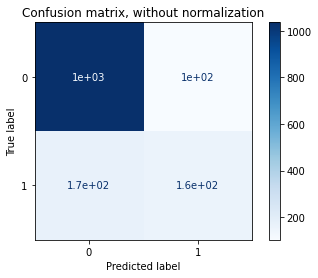

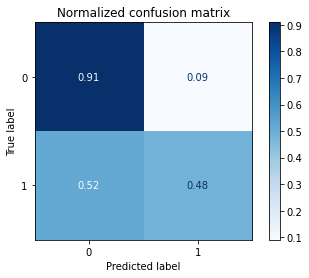

In [ ]:
########## Voici les matrices de confusions

from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf =KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train_std, y_train)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test_std, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
########## On va effectuer un grid search pour optimiser le parametre du nombre de voisins 

from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = ''

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
     # un classifieur kNN
         # hyperparamètres à tester
               # nombre de folds de validation croisée
     # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement


# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")


# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for
########## 7 ou 9 plus proches voisins semble le plus adapté


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 9}
Résultats de la validation croisée :
accuracy = 0.822 (+/-0.023) for {'n_neighbors': 3}
accuracy = 0.813 (+/-0.011) for {'n_neighbors': 5}
accuracy = 0.823 (+/-0.015) for {'n_neighbors': 7}
accuracy = 0.824 (+/-0.020) for {'n_neighbors': 9}
accuracy = 0.821 (+/-0.018) for {'n_neighbors': 11}
accuracy = 0.820 (+/-0.016) for {'n_neighbors': 13}
accuracy = 0.816 (+/-0.026) for {'n_neighbors': 15}


In [ ]:
########## et voici la courbe roc associée





NameError: ignored